In [1]:
'''
1. データセットの読み込みと正規化
'''
# tensorflow.keras のインポート
from tensorflow import keras

# Fashion-MNISTデータセットの読み込み
(x_train, t_train), (x_test, t_test) = keras.datasets.fashion_mnist.load_data()

# 訓練データを正規化
x_train = x_train / 255
# テストデータを正規化
x_test = x_test / 255

In [2]:
# RNNの構築
from tensorflow.keras import models, layers, optimizers, regularizers

# Sequentialオブジェクトを生成
model = models.Sequential()

## 入力層
# 入力データの形状は(28, 28)
model.add(
    layers.InputLayer(input_shape=(28,28))
    )

## 中間層
# LSTMブロック（ユニット数＝128）
weight_decay = 1e-4 # ハイパーパラメーター
model.add(layers.LSTM(units=128, dropout=0.25, return_sequences=True))
model.add(layers.LSTM(units=128, dropout=0.25, return_sequences=True))
model.add(layers.LSTM(units=128, dropout=0.5, return_sequences=False,
                      kernel_regularizer=regularizers.l2(weight_decay)) # 正則化
)

## 出力層
model.add(
    layers.Dense(units=10,           # 出力層のニューロン数は10
          activation='softmax')      # 活性化はソフトマックス関数
    )

# Squentialオブジェクをコンパイル
model.compile(
    # 損失関数はスパースラベル対応クロスエントロピー誤差
    loss='sparse_categorical_crossentropy',
    optimizer=optimizers.Adam(),     # Adamオプティマイザー
    metrics=['accuracy']             # 学習評価として正解率を指定
    )

model.summary()                      # RNNのサマリ（概要）を出力

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 128)           80384     
_________________________________________________________________
lstm_1 (LSTM)                (None, 28, 128)           131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 344,842
Trainable params: 344,842
Non-trainable params: 0
_________________________________________________________________


In [3]:
%%time
'''
3. モデルの学習
'''
epoch = 100
# ミニバッチのサイズ
batch_size = 64

history = model.fit(
    x_train,               # 訓練データ
    t_train,               # 正解ラベル
    epochs=epoch,          # エポック数を設定
    batch_size=batch_size, # ミニバッチのサイズを設定
    verbose=1,             # 進捗状況を出力
    validation_split=0.2   # 20パーセントのデータを検証に使用
    )

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 118s 2ms/sample - loss: 0.6913 - accuracy: 0.7458 - val_loss: 0.5236 - val_accuracy: 0.8086
Epoch 2/100
48000/48000 [==============================] - 102s 2ms/sample - loss: 0.5034 - accuracy: 0.8162 - val_loss: 0.4341 - val_accuracy: 0.8429
Epoch 3/100
48000/48000 [==============================] - 102s 2ms/sample - loss: 0.4469 - accuracy: 0.8362 - val_loss: 0.4225 - val_accuracy: 0.8513
Epoch 4/100
48000/48000 [==============================] - 102s 2ms/sample - loss: 0.4191 - accuracy: 0.8479 - val_loss: 0.3932 - val_accuracy: 0.8541
Epoch 5/100
48000/48000 [==============================] - 101s 2ms/sample - loss: 0.3935 - accuracy: 0.8561 - val_loss: 0.3768 - val_accuracy: 0.8698
Epoch 6/100
48000/48000 [==============================] - 102s 2ms/sample - loss: 0.3801 - accuracy: 0.8599 - val_loss: 0.3563 - val_accuracy: 0.8708
Epoch 7/100
48000/48000 [===================

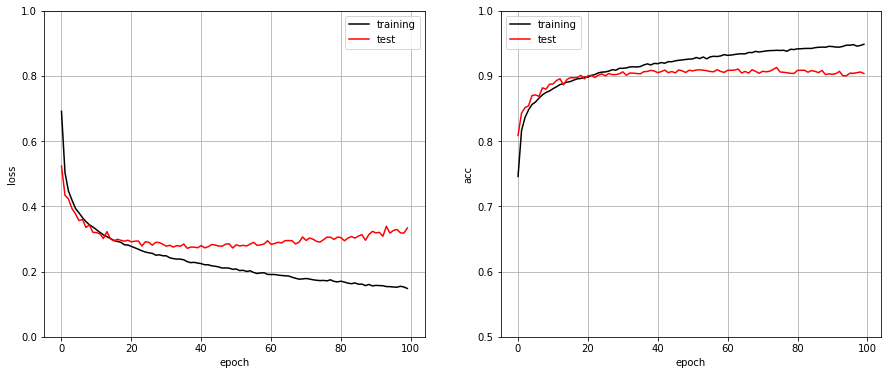

In [4]:
'''
4. 訓練データと検証データの損失と正解率をグラフにする
'''
import matplotlib.pyplot as plt
%matplotlib inline

# プロット図のサイズを設定
plt.ﬁgure(ﬁgsize=(15, 6))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)

# 1×2のグリッドの左(1,2,1)の領域にプロット
plt.subplot(1, 2, 1)
# 訓練データの損失(誤り率)をプロット
plt.plot(history.history['loss'],
         label='training',
         color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(history.history['val_loss'],
         label='test',
         color='red')
plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル

# 1×2のグリッドの右(1,2,21)の領域にプロット
plt.subplot(1, 2, 2)
# 訓練データの正解率をプロット
plt.plot(history.history['accuracy'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(history.history['val_accuracy'],
         label='test',
         color='red')
plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('acc')    # y軸ラベル
plt.show()

In [5]:
'''
5. テストデータによるモデルの評価
'''
# 学習済みのモデルにテストデータを入力して損失と精度を取得
test_loss, test_acc = model.evaluate(x_test, t_test, verbose=0)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.35847849665880205
test_acc: 0.8967
